In [ ]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 772.1 kB/s eta 0:00:00


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import os
from keras.applications.vgg16 import VGG16
import keras
from numpy import load
from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#1 - Inceptionresnet
#2 - VGG16
#3 - MobileNet

In [ ]:
base_dir = '/content/drive/My Drive/Data'
train_dir = os.path.join(base_dir, 'train')

test_dir = os.path.join(base_dir, 'test')

In [ ]:
batch_size = 10
epochs = 6
img_height = 224
img_width = 224

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 1650 images belonging to 5 classes.


In [ ]:
val_image_generator = ImageDataGenerator(rescale=1./255)
val_data_gen = val_image_generator .flow_from_directory(batch_size=batch_size,directory=test_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 1651 images belonging to 5 classes.


In [ ]:
from keras.applications import InceptionResNetV2

base_model1 = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))


219055592/219055592 [==============================] - 1s 0us/step


In [ ]:
base_model1.trainable = False

In [ ]:
base_model1.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_norm

In [ ]:
classifier1=keras.models.Sequential()
classifier1.add(base_model1)
classifier1.add(Flatten())
classifier1.add(Dense(5,activation='softmax'))
classifier1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 5, 5, 1536)        54336736  
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 38400)             0         
                                                                 
 dense (Dense)               (None, 5)                 192005    
                                                                 
Total params: 54528741 (208.01 MB)
Trainable params: 192005 (750.02 KB)
Non-trainable params: 54336736 (207.28 MB)
_________________________________________________________________


In [ ]:
classifier1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history1 = classifier1.fit(train_data_gen, epochs=15,
validation_data= val_data_gen,)

Epoch 1/15
165/165 [==============================] - 877s 5s/step - loss: 6.4347 - accuracy: 0.4752 - val_loss: 2.7934 - val_accuracy: 0.6099
Epoch 2/15
165/165 [==============================] - 92s 558ms/step - loss: 2.6965 - accuracy: 0.6764 - val_loss: 1.7559 - val_accuracy: 0.7662
Epoch 3/15
165/165 [==============================] - 92s 557ms/step - loss: 2.5151 - accuracy: 0.7255 - val_loss: 2.0965 - val_accuracy: 0.7547
Epoch 4/15
165/165 [==============================] - 92s 559ms/step - loss: 1.3527 - accuracy: 0.8091 - val_loss: 0.4805 - val_accuracy: 0.9243
Epoch 5/15
165/165 [==============================] - 92s 558ms/step - loss: 1.1996 - accuracy: 0.8509 - val_loss: 1.7556 - val_accuracy: 0.7771
Epoch 6/15
165/165 [==============================] - 92s 559ms/step - loss: 1.3448 - accuracy: 0.8570 - val_loss: 0.7863 - val_accuracy: 0.8879
Epoch 7/15
165/165 [==============================] - 92s 559ms/step - loss: 0.7929 - accuracy: 0.8958 - val_loss: 0.7723 - val_accu

In [ ]:
model_save_loc1="/content/drive/My Drive/InceptionResNet.h5"
classifier1.save(model_save_loc1)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction= classifier1.predict(val_data_gen, verbose=2)
prediction=np.argmax(prediction, axis=-1)

166/166 - 50s - 50s/epoch - 301ms/step


Confusion matrix, without normalization
[[491   5   5   3   0]
 [ 12 461  10   4   1]
 [  0   0 231   1   0]
 [  0   0   0 221   0]
 [  0   0   0   0 206]]
Accuracy: 0.975
Precision: 0.972
Recall: 0.975
F-Measure: 0.975


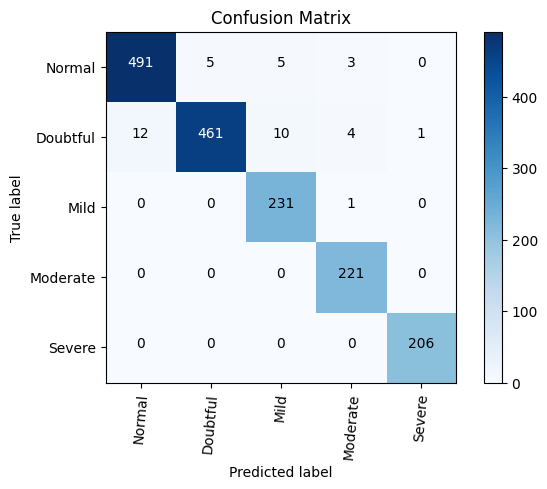

In [ ]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=85)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

cm_plot_labels = ["Normal","Doubtful","Mild","Moderate","Severe"]

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction)
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='micro')
print('F-Measure: %.3f' % score)

In [ ]:
base_model2 = VGG16(weights = 'imagenet', include_top=False, input_shape=(img_width, img_height, 3))
base_model2.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
classifier2=keras.models.Sequential()
classifier2.add(base_model2)
classifier2.add(Flatten())
classifier2.add(Dense(5,activation='softmax'))
classifier2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 5)                 125445    
                                                                 
Total params: 14840133 (56.61 MB)
Trainable params: 125445 (490.02 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
classifier2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history2 = classifier2.fit(train_data_gen, epochs=15,
validation_data= val_data_gen,)

Epoch 1/15
165/165 [==============================] - 804s 5s/step - loss: 1.5159 - accuracy: 0.4364 - val_loss: 0.9827 - val_accuracy: 0.6099
Epoch 2/15
165/165 [==============================] - 72s 439ms/step - loss: 0.8830 - accuracy: 0.6527 - val_loss: 0.7398 - val_accuracy: 0.6893
Epoch 3/15
165/165 [==============================] - 74s 449ms/step - loss: 0.8319 - accuracy: 0.6824 - val_loss: 0.7044 - val_accuracy: 0.7087
Epoch 4/15
165/165 [==============================] - 74s 448ms/step - loss: 0.6300 - accuracy: 0.7570 - val_loss: 0.6868 - val_accuracy: 0.7396
Epoch 5/15
165/165 [==============================] - 74s 451ms/step - loss: 0.4402 - accuracy: 0.8358 - val_loss: 0.3632 - val_accuracy: 0.8940
Epoch 6/15
165/165 [==============================] - 75s 453ms/step - loss: 0.3866 - accuracy: 0.8679 - val_loss: 0.3232 - val_accuracy: 0.9110
Epoch 7/15
165/165 [==============================] - 74s 451ms/step - loss: 0.3503 - accuracy: 0.8806 - val_loss: 0.2714 - val_accu

In [ ]:
save_path ="/content/drive/My Drive/VGG16(new).tf"  # Specify your desired directory
tf.keras.models.save_model(classifier2, save_path)

#model_save_loc2="/content/drive/My Drive/VGG16.h5"
#classifier1.save(model_save_loc2)

In [ ]:
y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction= classifier2.predict(val_data_gen, verbose=2)
prediction=np.argmax(prediction, axis=-1)

166/166 - 36s - 36s/epoch - 216ms/step


Confusion matrix, without normalization
[[503   0   0   1   0]
 [ 20 464   1   3   0]
 [  0   1 229   2   0]
 [  0   0   0 221   0]
 [  0   0   0   0 206]]
Accuracy: 0.983
Precision: 0.997
Recall: 0.983
F-Measure: 0.983


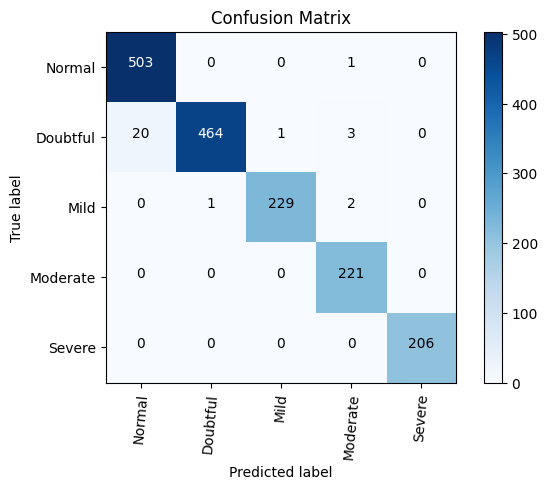

In [ ]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=85)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

cm_plot_labels = ["Normal","Doubtful","Mild","Moderate","Severe"]

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction)
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='micro')
print('F-Measure: %.3f' % score)

In [ ]:
from keras.applications import MobileNet
img_width = 224
img_height = 224  # Or any other desired dimensions for MobileNet

base_model3 = MobileNet(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))


17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
base_model3.trainable = False

In [ ]:
classifier3=keras.models.Sequential()
classifier3.add(base_model3)
classifier3.add(Flatten())
classifier3.add(Dense(5,activation='softmax'))
classifier3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 flatten_1 (Flatten)         (None, 50176)             0         
                                                                 
 dense_1 (Dense)             (None, 5)                 250885    
                                                                 
Total params: 3479749 (13.27 MB)
Trainable params: 250885 (980.02 KB)
Non-trainable params: 3228864 (12.32 MB)
_________________________________________________________________


In [ ]:
classifier3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history3 = classifier3.fit(train_data_gen, epochs=15,
validation_data= val_data_gen,)

Epoch 1/15
165/165 [==============================] - 25s 142ms/step - loss: 6.3584 - accuracy: 0.5394 - val_loss: 1.7948 - val_accuracy: 0.8159
Epoch 2/15
165/165 [==============================] - 23s 137ms/step - loss: 1.9963 - accuracy: 0.8115 - val_loss: 2.3064 - val_accuracy: 0.7947
Epoch 3/15
165/165 [==============================] - 23s 138ms/step - loss: 1.5713 - accuracy: 0.8558 - val_loss: 1.1143 - val_accuracy: 0.8843
Epoch 4/15
165/165 [==============================] - 23s 138ms/step - loss: 1.3894 - accuracy: 0.8873 - val_loss: 1.1107 - val_accuracy: 0.9049
Epoch 5/15
165/165 [==============================] - 23s 137ms/step - loss: 0.7761 - accuracy: 0.9321 - val_loss: 0.5379 - val_accuracy: 0.9606
Epoch 6/15
165/165 [==============================] - 23s 141ms/step - loss: 0.6144 - accuracy: 0.9442 - val_loss: 0.3925 - val_accuracy: 0.9649
Epoch 7/15
165/165 [==============================] - 23s 137ms/step - loss: 0.7937 - accuracy: 0.9400 - val_loss: 1.3370 - val_ac

In [ ]:
save_path ="/content/drive/My Drive/MobileNet(new).h5"  # Specify your desired directory
tf.keras.models.save_model(classifier3, save_path)

#model_save_loc3="/content/drive/My Drive/MobileNet.h5"
#classifier1.save(model_save_loc3)

<ipython-input-34-f19e337228ec>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(classifier3, save_path)


In [ ]:
y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction= classifier3.predict(val_data_gen, verbose=2)
prediction=np.argmax(prediction, axis=-1)

166/166 - 12s - 12s/epoch - 70ms/step


Confusion matrix, without normalization
[[495   5   3   1   0]
 [ 10 466   9   3   0]
 [  1   0 230   1   0]
 [  0   2  17 198   4]
 [  0   0   1   0 205]]
Accuracy: 0.965
Precision: 0.950
Recall: 0.965
F-Measure: 0.965


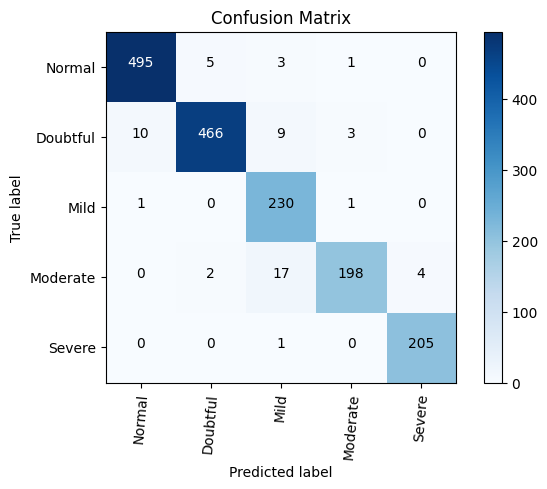

In [ ]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=85)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

cm_plot_labels = ["Normal","Doubtful","Mild","Moderate","Severe"]

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction)
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='micro')
print('F-Measure: %.3f' % score)

In [ ]:
!pip install h5py
from tensorflow.keras.models import load_model

In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
!pip install keras_preprocessing

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input_vgg16
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input as preprocess_input_inceptionresnet
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input as preprocess_input_mobilenet
from tensorflow.keras.applications.mobilenet import MobileNet
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
import numpy as np

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os


In [ ]:
m1 =loaded_model = tf.keras.models.load_model("/content/drive/My Drive/InceptionResNet(new).tf")

m2 =classifier2 = tf.keras.models.load_model("/content/drive/My Drive/VGG16(new).tf")

m3 =classifier3

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import sys
import os
from keras.applications.vgg16 import VGG16
import keras
from numpy import load

from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization


In [ ]:
batch_size = 10
epochs = 6
img_height = 224
img_width = 224

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 1650 images belonging to 5 classes.


In [ ]:
val_image_generator = ImageDataGenerator(rescale=1./255)
val_data_gen = val_image_generator .flow_from_directory(batch_size=batch_size,directory=test_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 1651 images belonging to 5 classes.


In [ ]:
models = [m1, m2, m3]
model_input = tf.keras.Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = tf.keras.layers.Average() (model_outputs)
ensemble_model = tf.keras.Model(inputs=model_input, outputs=ensemble_output)

In [ ]:


ensemble_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
train_ds = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 1650 images belonging to 5 classes.


In [ ]:
val_image_generator = ImageDataGenerator(rescale=1./255)
val_ds = val_image_generator .flow_from_directory(batch_size=batch_size,directory=test_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 1651 images belonging to 5 classes.


In [ ]:
class WeightedAverageLayer(tf.keras.layers.Layer):
  def __init__(self, w1, w2,w3,**kwargs):
    super(WeightedAverageLayer, self).__init__(** kwargs)
    self.w1 = w1
    self.w2 = w2
    self.w3 = w3

  def call(self, inputs):
    return self.w1 * inputs[0] + self.w2 * inputs[1] + self.w3 * inputs[2]

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
ensemble_output = WeightedAverageLayer(0.1,0.7,0.2) (model_outputs)
ensemble_model =tf.keras.Model(inputs=model_input, outputs=ensemble_output)

In [ ]:
!pip install tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 3.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
ensemble_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history4=ensemble_model.fit(
train_ds,
validation_data=val_ds,
epochs=15)

Epoch 1/15
165/165 [==============================] - 156s 876ms/step - loss: 0.2388 - accuracy: 0.9236 - val_loss: 0.1492 - val_accuracy: 0.9612
Epoch 2/15
165/165 [==============================] - 139s 847ms/step - loss: 0.1643 - accuracy: 0.9473 - val_loss: 0.1262 - val_accuracy: 0.9727
Epoch 3/15
165/165 [==============================] - 140s 853ms/step - loss: 0.1271 - accuracy: 0.9655 - val_loss: 0.1703 - val_accuracy: 0.9322
Epoch 4/15
165/165 [==============================] - 141s 857ms/step - loss: 0.1570 - accuracy: 0.9503 - val_loss: 0.0981 - val_accuracy: 0.9812
Epoch 5/15
165/165 [==============================] - 140s 850ms/step - loss: 0.1541 - accuracy: 0.9545 - val_loss: 0.1026 - val_accuracy: 0.9788
Epoch 6/15
165/165 [==============================] - 141s 859ms/step - loss: 0.0969 - accuracy: 0.9709 - val_loss: 0.0878 - val_accuracy: 0.9830
Epoch 7/15
165/165 [==============================] - 143s 866ms/step - loss: 0.0820 - accuracy: 0.9824 - val_loss: 0.0823 -

In [ ]:
save_path ="/content/drive/My Drive/Ensemble(new).tf"  # Specify your desired directory
tf.keras.models.save_model(classifier2, save_path)

#model_save_loc4="/content/drive/My Drive/Ensemble2.h5"
#ensemble_model.save(model_save_loc4)

In [ ]:
import tensorflow as tf
#ensemble_model=tf.keras.models.load_model("C:/Users/ashiq/Desktop/Ashiq/trained_model/Ensemble.h5")

In [ ]:
y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction= ensemble_model.predict(val_data_gen, verbose=2)
prediction=np.argmax(prediction, axis=-1)

166/166 - 74s - 74s/epoch - 447ms/step


Confusion matrix, without normalization
[[503   1   0   0   0]
 [ 14 474   0   0   0]
 [  0   2 230   0   0]
 [  4   0   1 216   0]
 [  0   0   0   0 206]]
Accuracy: 0.987
Precision: 0.994
Recall: 0.987
F-Measure: 0.987


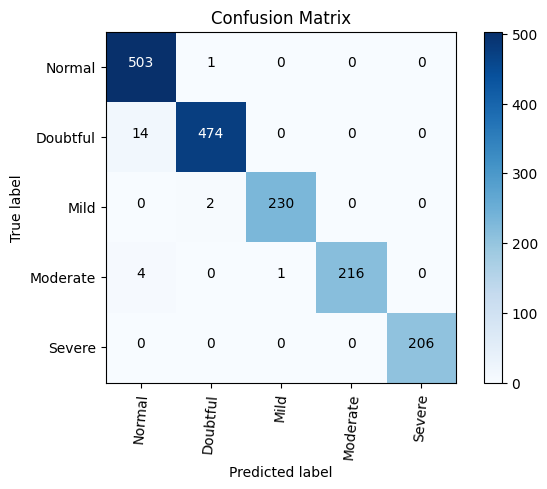

In [ ]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=85)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

cm_plot_labels = ["Normal","Doubtful","Mild","Moderate","Severe"]

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction)
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='micro')
print('F-Measure: %.3f' % score)
